In [42]:
# Import library for visualization
import sys
sys.path.append("../../python")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from os import listdir, path, makedirs
from auditing_setup.election_setting import Election
from collections import defaultdict

In [81]:
base_path = "../../sample_size/"

# We parse the file structure into a dictionary/pandas dataframe
def parse_election_name_to_object(election_string):
    election_params = {}
    for election_pair in election_string.split("_"):
        key, value = election_pair.split("=")
        election_params[key] = eval(value.lstrip("0"))
    return Election(**election_params)
            

def parse_data_dir(data_dir):
    data_dir_df = pd.DataFrame()
    df_dict = defaultdict(pd.DataFrame)
    for election_dir_file in listdir(data_dir):
        election = parse_election_name_to_object(election_dir_file)
        for data_dir_file in listdir(path.join(data_dir, election_dir_file)):
            for data_file in listdir(path.join(data_dir, election_dir_file, data_dir_file)):
                key = data_file.replace(".csv","")
                data_file = path.join(data_dir, election_dir_file, data_dir_file, data_file)
                data = pd.read_csv(data_file).iloc[0]
                data.name = election
                df_dict[key] = df_dict[key].append(data)
    for df in df_dict.values():
        df.index.set_names("election", inplace=True)
    return df_dict

In [82]:
df_dict = parse_data_dir(base_path)
cols = []
for i in list(df_dict.values())[0].columns:
    try:
        float(i)
        cols.append(i)
    except Exception as e:
        pass
list(df_dict.keys())

['bayesian_unconditional_quantile0.50',
 'bayesian_conditionalmean',
 'bayesian_unconditional_quantile0.90',
 'bayesian_unconditional_mean',
 'bayesian_cdf',
 'bayesian_conditional_quantile0.99',
 'bayesian_conditional_quantile0.75',
 'bayesian_unconditional_quantile0.25',
 'bayesian_conditional_quantile0.50',
 'bayesian_conditional_quantile0.90',
 'bayesian_pdf',
 'bayesian_power',
 'bayesian_conditional_quantile0.25',
 'bayesian_unconditional_quantile0.75',
 'bayesian_unconditional_mean_with_recount',
 'bayesian_unconditional_quantile0.99']

Text(0.5, 0, 'True p')

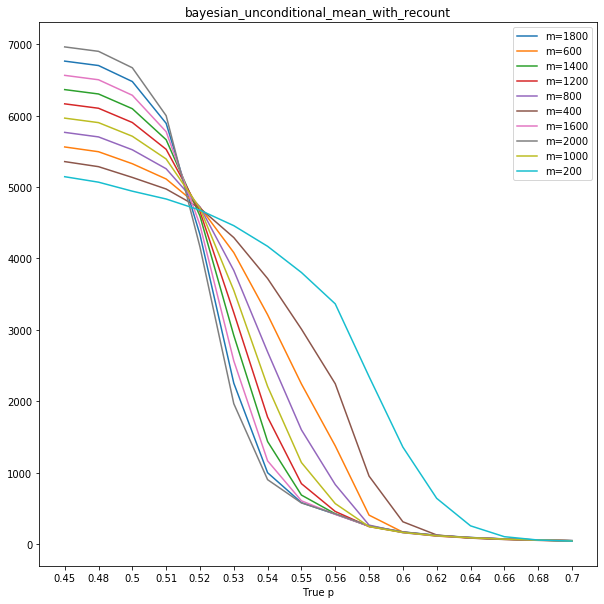

In [92]:
df = df_dict["bayesian_unconditional_mean_with_recount"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([f"m={i.m}" for i in df.index])
plt.title("bayesian_unconditional_mean_with_recount")
plt.xlabel("Expected number")
plt.xlabel("True p")

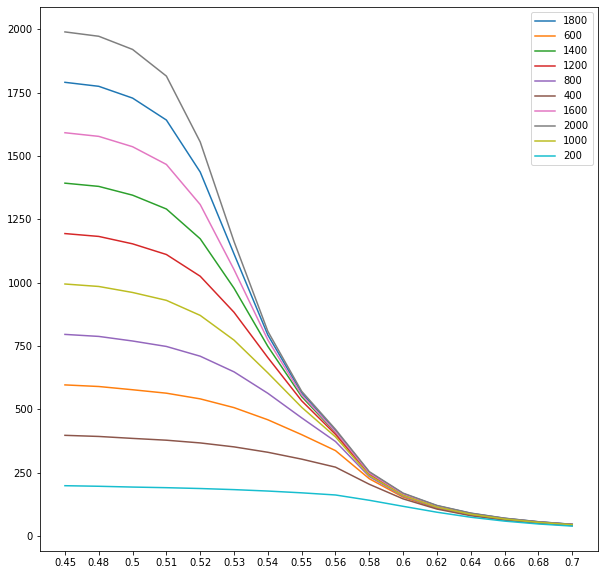

In [89]:
df = df_dict["bayesian_unconditional_mean"]
plt.figure(figsize=[10,10])
plt.plot(cols, df[cols].transpose())
plt.legend([i.m for i in df.index])